In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
def csv_to_df(csv):
    df = pd.read_csv(csv)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  
    df['relative_time'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / 60
    return df

In [49]:
def plot_graph(df):
    plt.figure(figsize=(14, 6))
    plt.scatter(df['relative_time'], df['probability'], label='Focus Level')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Focus Probability')
    plt.title('Focus Level Over Movie Watch Time')
    plt.grid(True)
    high_focus_threshold = 0.5
    high_focus_segments = df[df['probability'] > high_focus_threshold]
    plt.scatter(high_focus_segments['relative_time'], high_focus_segments['probability'], color='red', label='High Focus')
    plt.legend()
    plt.show()

In [50]:
gt_df = csv_to_df('gt_movie_focus.csv')
hk_df = csv_to_df('hunter_killer_focus.csv')
murder_df = csv_to_df('murder_on_the_orient_express_focus.csv')
rocky_df = csv_to_df('rocky_focus.csv')

Gran Turismo Focus Data


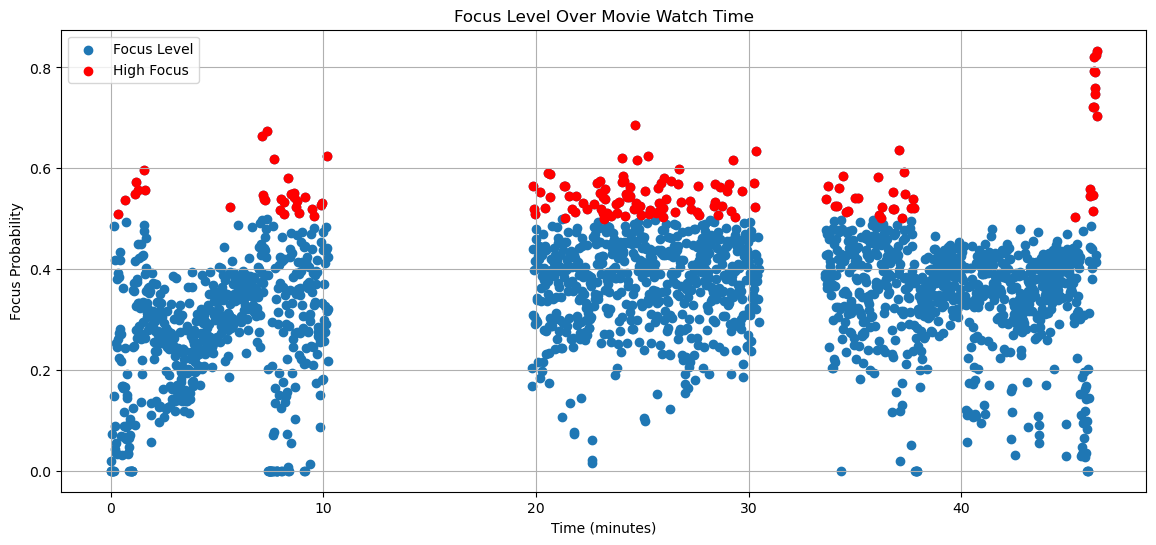

In [56]:
print('Gran Turismo Focus Data')
plot_graph(gt_df)

Hunter Killer Focus Data


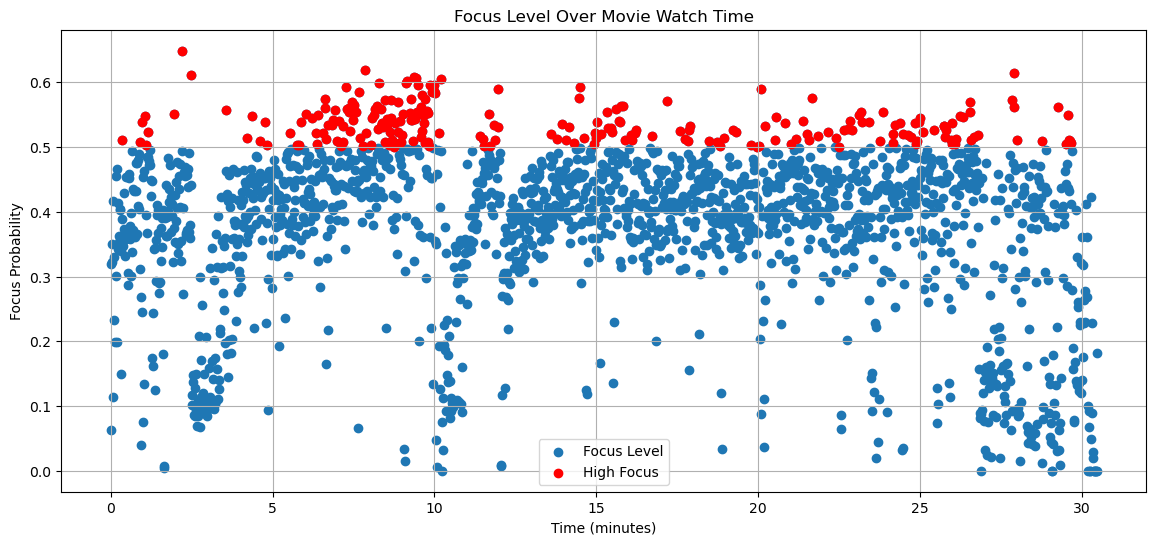

In [57]:
print('Hunter Killer Focus Data')
plot_graph(hk_df)

Murder on the Orient Express Focus Data


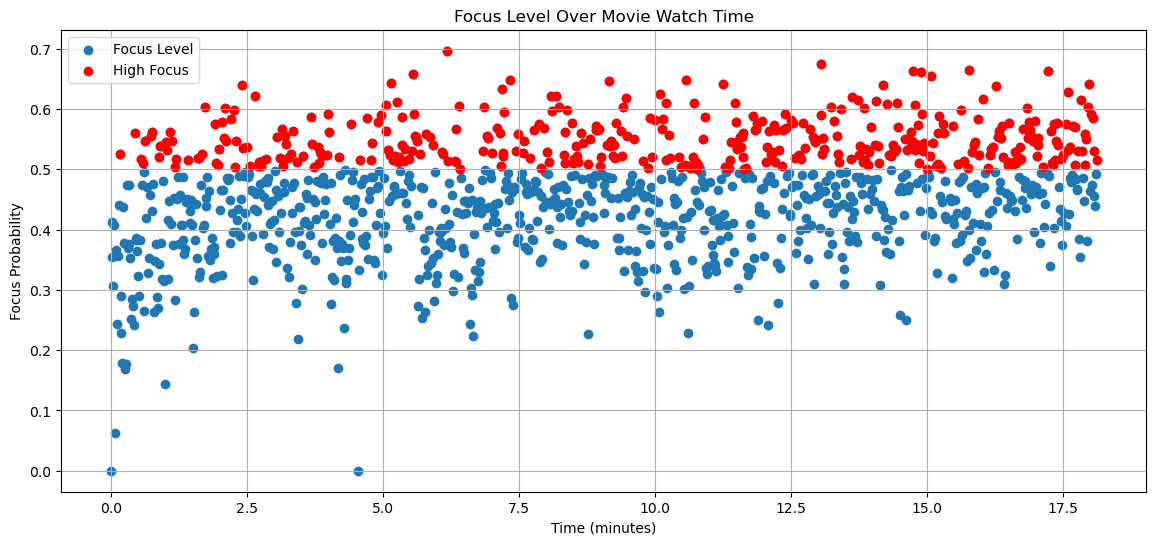

In [58]:
print('Murder on the Orient Express Focus Data')
plot_graph(murder_df)

Rocky Focus Data


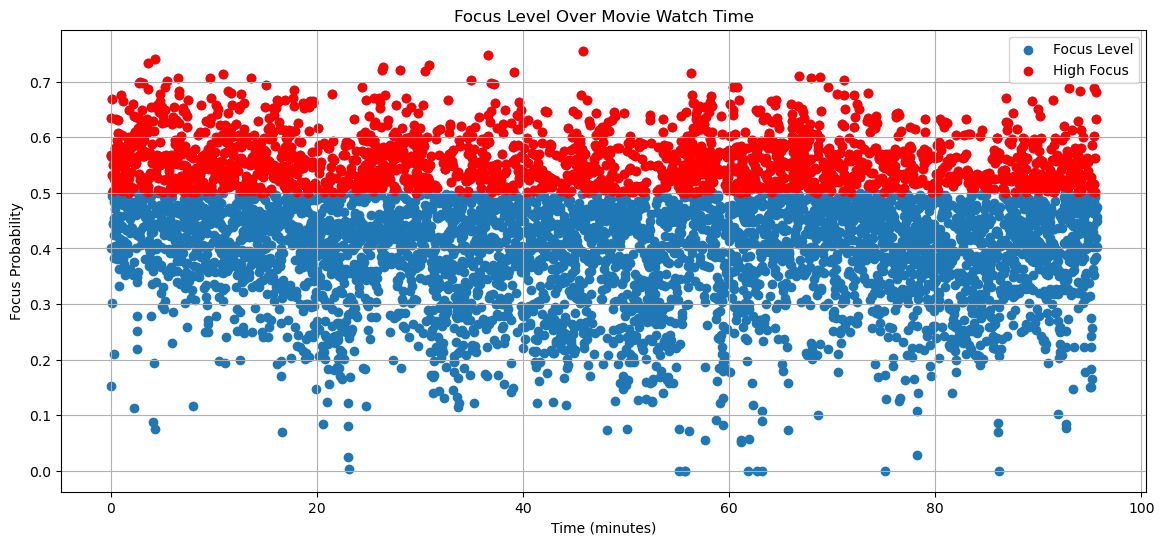

In [59]:
print('Rocky Focus Data')
plot_graph(rocky_df)